I would like to investigate the general question 3, about which time windows are likely to be the most busy, posed by the research group led by Frank Wood. The specifc question I will answer based on their general question is: Can the start time (of day) and duration of play sessions be predicted by a player's age, experience, and number of play hours?

The sessions file will provide me with information about player's gaming session start times, end times, and the duration of their sessions by subtracting start times from end times. The players data set will provide me with characteristic information and ideitifying information about the player. I will match players' information between the two data sets by matching hashed emails. The window of highest traffic for a player can be determined by adding their predicted duration onto their predicted start time.

I will wrangle the data from sessions.csv so that I have separate columns for date and time and all of the components therein. I will also make it so that minutes are converted to hours and then added back onto the hours column so that player start times, end times, and session durations are only in one unit hours. I will convert the experience variable into a numeric variable by assigning each of the labels a number, with beginners being the lowest at 1 and pros being the highest at 5. I will also create a variable about session duration by subtracting session start time from end time for each observation.

One issue with calculating session duration is that I will probably get some numbers which are at or lower than -23 given that some players will start around 23 hours and end early in the morning around 0-1 hours which will make for a very big difference in numbers but actually be equal to about 1-2 hours of play time.

In [1]:
library(tidyverse)
library(repr)
library(ggplot2)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
players_data <- read_csv("players.csv")
head(players_data)
sessions_data <- read_csv("sessions.csv")
head(sessions_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Players Data Set
   
    * 7 columns/variables
    * 196 rows/observations
    * 4 character vectors
        + experience
        + name
        + hashedEmail
        + gender 
    * 2 double vectors
        + Age
        + played_hours 
    * 1 logical vector
        + subscribe i.e. whether the player is subscribed to the newsletter or not
The experience variable is a categorical variable with labels: pro, veteran, regular, amateur, or beginner. Gender is also a categorical variable with 7 options: male, female, agender, non-binary, two-spirited, other, and prefer not to say. 
Issues with this data set are that experience is not a factor vector like it should be since it is a categorical variable, the same could also be said for gender. Another issue is that if you wanted to use experience as a predictor you would have to convert its labels to numbers so calculations could be performed. If you wanted to use gender as a predictor it would also be tricky because it is not a numerical variable and the values of its labels don't obviously correspond to a numerical continuum.

Sessions Data Set

    * 5 columns/variables
    * 1535 rows/observations
    * 3 chracter vectors
        + hashedEmail
        + start_time
        + end_time
    * 2 double vectors
        + orginial_start_time
        + original_end_time
The start_time and end_time vectors include both day/month/year dates as well as a 24-hour time. It is unclear exactly what units are being use for original_start/end_time but they are not comprehensible to a human.

In [3]:
players_avgs <- players_data |>
    select(played_hours, Age)|>
    map_dfr( mean, na.rm =TRUE)

players_avgs

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


In [4]:
players_max <- players_data|>
    select(played_hours, Age)|>
    map_dfr(max, na.rm = TRUE)

players_max

played_hours,Age
<dbl>,<dbl>
223.1,58


In [5]:
players_min <- players_data|>
    select(played_hours, Age)|>
    map_dfr(min, na.rm = TRUE)

players_min

played_hours,Age
<dbl>,<dbl>
0,9


In [6]:
players_wrang <- players_data |>
    mutate( experience = as_factor(experience))|>
    mutate( experience = fct_recode(experience,
                                    "1" = "Beginner",
                                    "2" = "Amateur",
                                    "3" = "Regular",
                                    "4" = "Veteran",
                                    "5" = "Pro"))|>
    mutate(experience = as.numeric(experience))

experience_mean <- players_wrang|>
    select(experience)|>
    map_dfr(mean, na.rm = TRUE)

experience_mean

experience
<dbl>
3.153061


This means that the average player is a "Regular", or this also means that the researchers go a great even spread of players with different experience levels.

In [7]:
sessions_wrang <- sessions_data |>
    separate_wider_delim( cols = start_time,
                         delim = " ",
                         names = c("start_date", "start_time"))|>
    separate_wider_delim( cols = end_time,
                         delim = " ",
                         names = c("end_date", "end_time"))|>
    separate(col= start_date,
             c( "start_day", "start_month", "start_yr"),
             sep = "/",
             remove = FALSE,
             convert = TRUE)|>
    separate(col= end_date,
             c( "end_day", "end_month", "end_yr"),
             sep = "/",
             remove = FALSE,
             convert = TRUE)|>
    separate(col = start_time,
             c( "start_hour", "start_minutes"),
            sep = ":", 
             remove = FALSE,
            convert = TRUE)|>
    separate(col = end_time,
             c( "end_hour", "end_minutes"),
            sep = ":", 
             remove = FALSE,
            convert = TRUE)|>
    mutate( decimal_start_minutes = start_minutes/60 )|>
    mutate(decimal_start_hr = decimal_start_minutes + start_hour)|>
    mutate( decimal_end_minutes = end_minutes/60 )|>
    mutate(decimal_end_hr = decimal_end_minutes + end_hour)|>
    mutate(duration_hrs = decimal_end_hr - decimal_start_hr)

sessions_avgs<- sessions_wrang|>
    select(start_yr, start_month, start_day, decimal_start_hr, original_start_time, original_end_time, end_yr, end_month, end_day, decimal_end_hr, duration_hrs)|>
    map_dfr(mean, na.rm = TRUE)

sessions_avgs

start_yr,start_month,start_day,decimal_start_hr,original_start_time,original_end_time,end_yr,end_month,end_day,decimal_end_hr,duration_hrs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024,6.244951,16.42215,10.68664,1.719201e+12,1.719196e+12,2024,6.243966,16.41683,10.09392,-0.5926723


The mean start time of day is 10:41 am. The mean start month is 6.24 or June. The mean start day is the 16th. The mean start year is 2024. The mean end time of day is 10:05. The mean end month is 6.24 or June. The mean end day is the 16th. The mean end year is 2024. The mean original_start_time is 1.719201e+12. The mean original_end_time is 1.71919e+12. The mean session duration is -.5926723 hours or about -35.5 minutes. The reason there is a negative number is because a lot of the end times were at or a little bit past 12 am which is 0 in the data set and the start time was probably something like 11pm or 23 hrs on a 24 hour clock. So there were a couple of duration data points which were below -23 hours which skewed the average negatively even though the majority of the durations are between 0 and 1.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


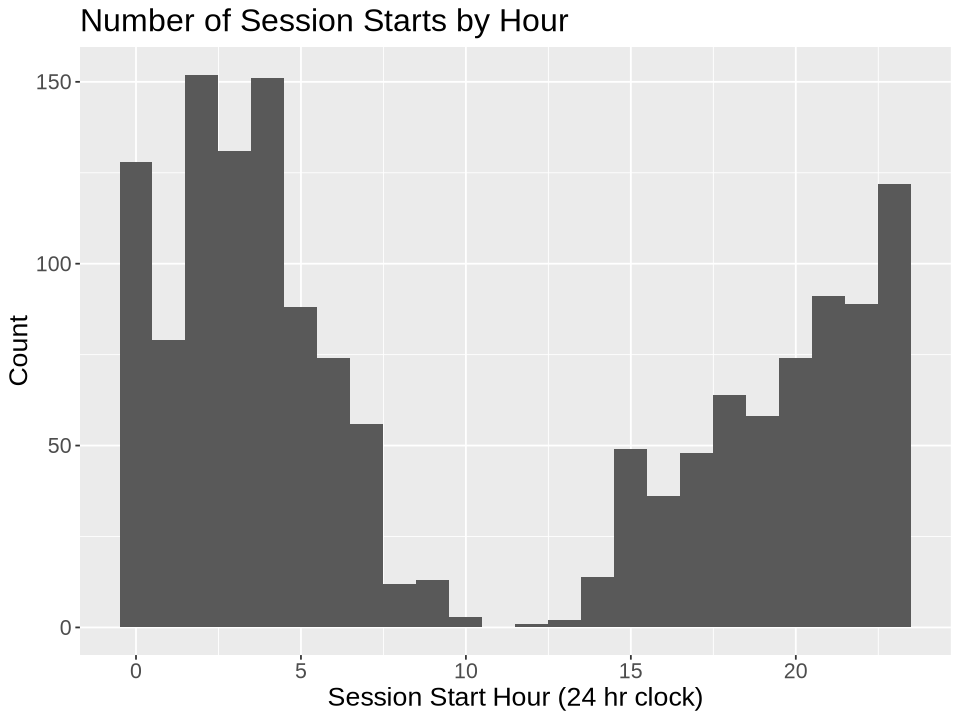

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


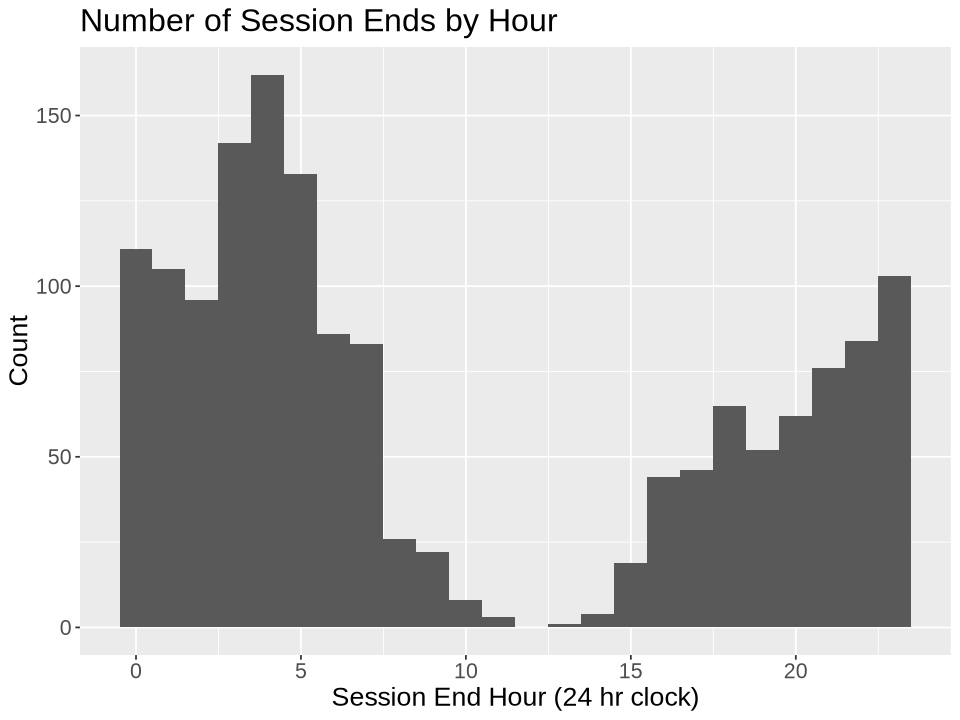

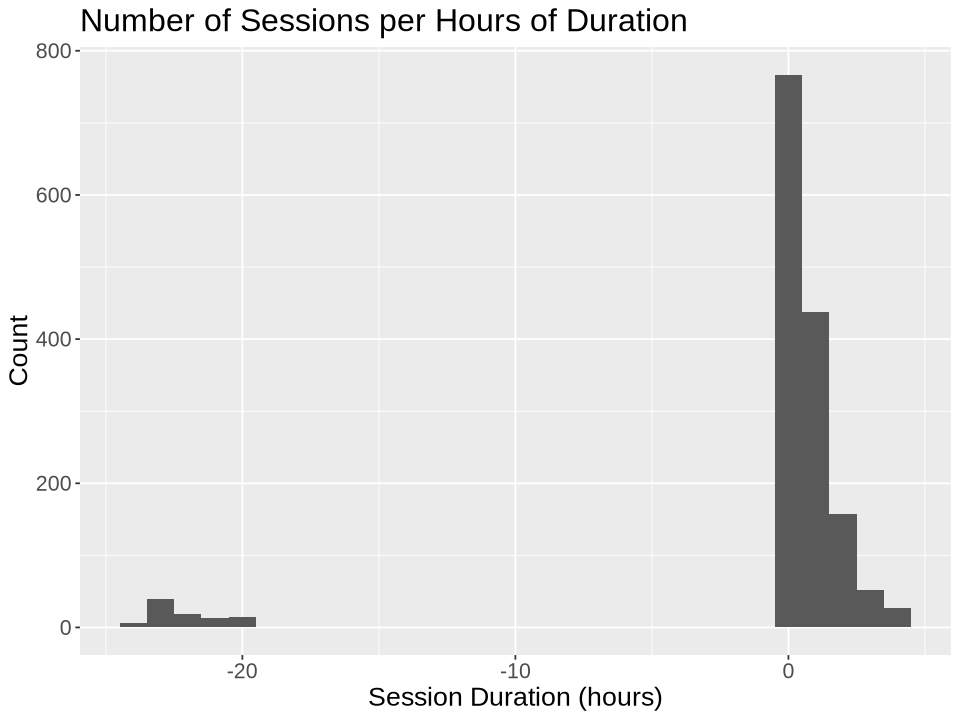

In [8]:
#exploratory visualizations
options(repr.plot.height = 6, repr.plot.width = 8)

start_time_hist <- sessions_wrang|>
    ggplot( aes(x= start_hour))+
    geom_histogram(binwidth = 1)+
    labs(x= "Session Start Hour (24 hr clock)", y = "Count", title = "Number of Session Starts by Hour")+
    theme( text = element_text(size = 16))

end_time_hist <- sessions_wrang|>
    ggplot( aes(x= end_hour))+
    geom_histogram(binwidth = 1 )+
    labs(x= "Session End Hour (24 hr clock)", y = "Count", title = "Number of Session Ends by Hour")+
    theme( text = element_text(size = 16))

duration_hist <- sessions_wrang|>
    ggplot( aes(x= duration_hrs))+
    geom_histogram(binwidth = 1)+
    labs(x= "Session Duration (hours)", y = "Count", title = "Number of Sessions per Hours of Duration")+
    theme( text = element_text(size = 16))

start_time_hist
end_time_hist
duration_hist

Using these visualizations I can see that the mode for start time, i.e. the time were the most people have started a play session, is about 2 am, a close runner up is 4 am. The mode for end time is 4 am. The mode for session duration is from 0-1 hours of play.

In [12]:
#wrangling by combining players and sessions data sets, also screening for matching hashedEmails which will match data from each data set to each other by email
combo_data <- inner_join(sessions_wrang, players_wrang)|>
    select(-start_hour, -start_minutes, -start_yr, -start_month, -start_day, -decimal_start_minutes, -end_hour,
           -end_minutes, -end_yr, -end_date, -start_date, -end_month, -end_day, -decimal_end_minutes, -original_start_time,
           -original_end_time)
    
head(combo_data)
#this data set has as many observations as the sessions data set, so each of the observations from the players data set were duplicated each time the corresponding
#email showed up in the sessions data set, i.e. the more sessions someone has the more their identifiers show up in this combined data set

Joining with `by = join_by(hashedEmail)`


hashedEmail,start_time,end_time,decimal_start_hr,decimal_end_hr,duration_hrs,experience,subscribe,played_hours,name,gender,Age
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,18:12,18:24,18.200000,18.400000,0.2000000,4,TRUE,223.1,Hiroshi,Male,17
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,23:33,23:46,23.550000,23.766667,0.2166667,3,TRUE,53.9,Alex,Male,17
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,17:34,17:57,17.566667,17.950000,0.3833333,3,TRUE,150.0,Delara,Female,16
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,03:22,03:58,3.366667,3.966667,0.6000000,4,TRUE,223.1,Hiroshi,Male,17
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,16:01,16:12,16.016667,16.200000,0.1833333,3,TRUE,53.9,Alex,Male,17
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,15:08,17:10,15.133333,17.166667,2.0333333,4,TRUE,223.1,Hiroshi,Male,17


In [15]:
#visualizatioins between response variables and predictors, use facet_grid?
options(repr.plot.height = 8, repr.plot.width = 10)
# start_time_vs_predictors <- combo_data|>
#     select(decimal_start_hr, Age, experience, played_hours)|>
#     ggpairs(mapping = aes(alpha = 0.4)) +
#     theme(text = element_text(size = 20))

start_hrs_vs_Age <- combo_data|>
    ggplot (aes(x=decimal_start_hr, y=Age))+
    geom_point(alpha = 0.4)+
    theme(text = element_text(size= 16))

I plan to predict the hours of highest traffic by perfoming KNN regression using predictors Age, experience (as a numerical variable), and played_hours to predict decimal_start_hrs, and session duration. There will be two separate models for predicting duration and start time but the same predictors will be used. The reason I am not using the other variables is because they are not numerical and therefore calculations cannot be performed on them, and some variables their information is redundant (all of the variables that were intermediaries on the way to creating duration and decimal start time).

The reason I have chosen to use KNN regression instead of linear regression is that the relationships between the predictors and the response variables are probably not going to be linear, and the model won't predict numbers outside of the 24 hour clock, for example it won't predict a number higher than 24 or lower than 0. 

Use knn regression
        
        *don't have to worry about values outside of 0-24
        *don't have to worry about the relationships being linear